## <center>Car Evaluation</center>

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score,accuracy_score, cohen_kappa_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier.rocauc import roc_auc
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [3]:
car_data = pd.read_csv('car_evaluation.csv')
car_data.columns = ['Buying_price','Maintainance_Price','No_of_doors','Person_Capacity','Size_of_luggage','Safety','Acceptability']
car_data.head()

,Buying_price,Maintainance_Price,No_of_doors,Person_Capacity,Size_of_luggage,Safety,Acceptability
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [4]:
car_data.isna().sum()

Buying_price          0
Maintainance_Price    0
No_of_doors           0
Person_Capacity       0
Size_of_luggage       0
Safety                0
Acceptability         0
dtype: int64

In [5]:
car_data.dtypes

Buying_price          object
Maintainance_Price    object
No_of_doors           object
Person_Capacity       object
Size_of_luggage       object
Safety                object
Acceptability         object
dtype: object

In [6]:
Class_distribution = pd.DataFrame(car_data.Acceptability.value_counts())
total = Class_distribution.sum()
Class_distribution['P%'] = Class_distribution['Acceptability'].apply(lambda x: round((x/total)*100,2))
Class_distribution

,Acceptability,P%
unacc,1210,70.02
acc,384,22.22
good,69,3.99
vgood,65,3.76


### Data Visualization

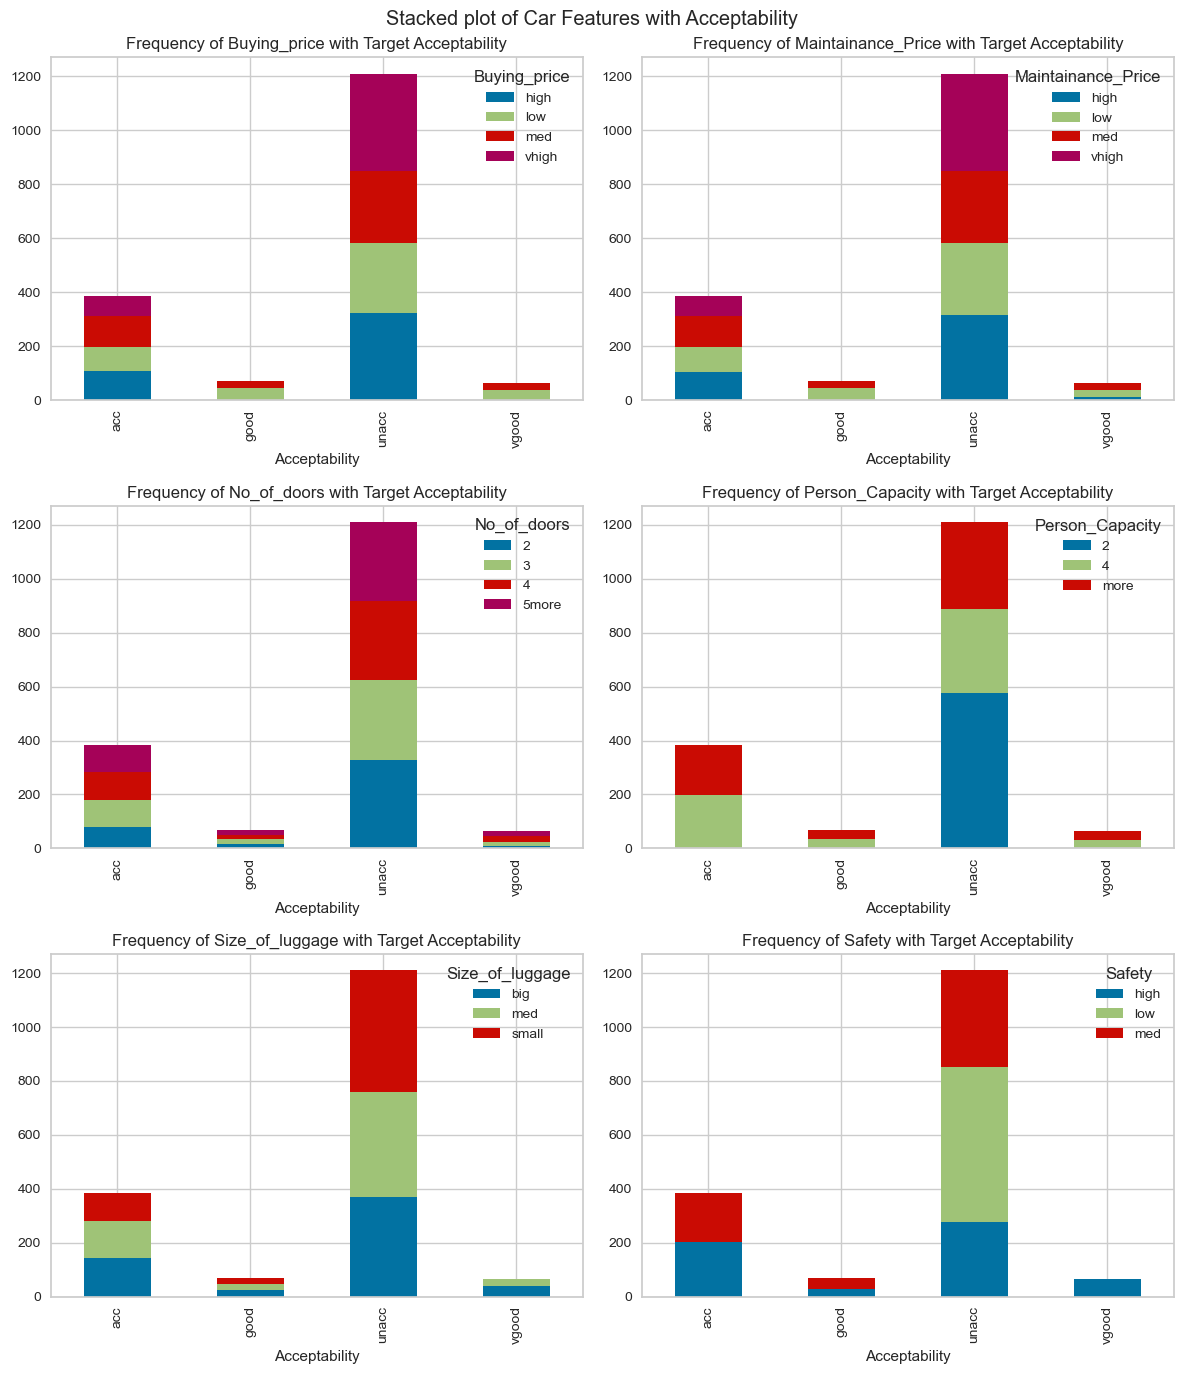

In [7]:
fig = plt.figure(figsize=(12,14))
fig.suptitle('Stacked plot of Car Features with Acceptability')
for i in range(1,7):
    column = car_data.columns[i-1]
    ax = fig.add_subplot(3,2,i)
    group = car_data[['Acceptability',column]].groupby(['Acceptability',column]).size().unstack(fill_value=0)
    group.plot(kind='bar',stacked=True, ax=ax)
    ax.set_title('Frequency of '+column+' with Target Acceptability')
    plt.tight_layout()

### Encoding 

In [12]:
##Label Encoding On Features
Encoded_car = pd.DataFrame()
Encoder = LabelEncoder()
for i in car_data.columns[:-1]:
    Encoded_car[i] = Encoder.fit_transform(car_data[i])
    
##Ordinal Encoding on Target Class
categry = car_data['Acceptability'].unique()
encoder = OrdinalEncoder(categories=[categry])
Target = pd.DataFrame(encoder.fit_transform(car_data[['Acceptability']]),columns=['Acceptability'])
categry

array(['unacc', 'acc', 'vgood', 'good'], dtype=object)

Text(0.5, 1.0, 'Correlation of Features with Acceptability')

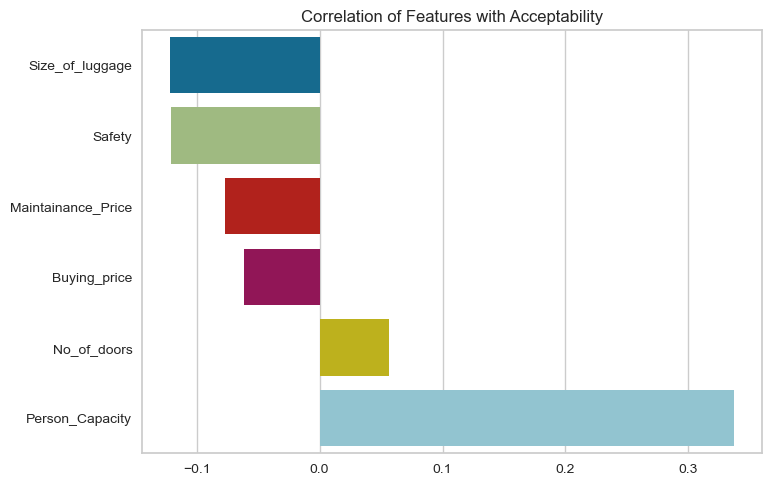

In [10]:
cor = pd.concat([Encoded_car,Target],axis=1).corr()['Acceptability'].drop('Acceptability').sort_values()
sns.barplot(x=cor.values,y=cor.index,orient='h').set_title('Correlation of Features with Acceptability')

In [219]:
x_train, x_test, y_train, y_test = train_test_split(Encoded_car,Target,test_size=0.2 , random_state=100)

In [220]:
def report(model,Y_test,Y_pred):
    cls = {
        'Accuracy' : round(accuracy_score(Y_test,Y_pred),2),
    'Precision Wgt' : round(precision_score(Y_test,Y_pred,average='weighted'),2),
    'F1 Score Wgt': round(f1_score(Y_test,Y_pred,average='weighted'),2),
     'Recall Wgt': round(recall_score(Y_test,Y_pred,average='weighted'),2),
        'Kappa Score' : round(cohen_kappa_score(Y_test, Y_pred),2)
    }
    return pd.DataFrame(cls.values(),index=cls.keys(),columns=[model])
def roc(model):
    visual = ROCAUC(model)
    visual.fit(x_train,y_train)
    visual.score(x_test,y_test)
    visual.show()
    return

In [221]:
Class = pd.DataFrame()

### Logistric Regression

               Logistic Regression
Accuracy                      0.70
Precision Wgt                 0.62
F1 Score Wgt                  0.65
Recall Wgt                    0.70
Kappa Score                   0.14


Text(0.5, 1.0, 'Logistic Regression Confusion Matrix')

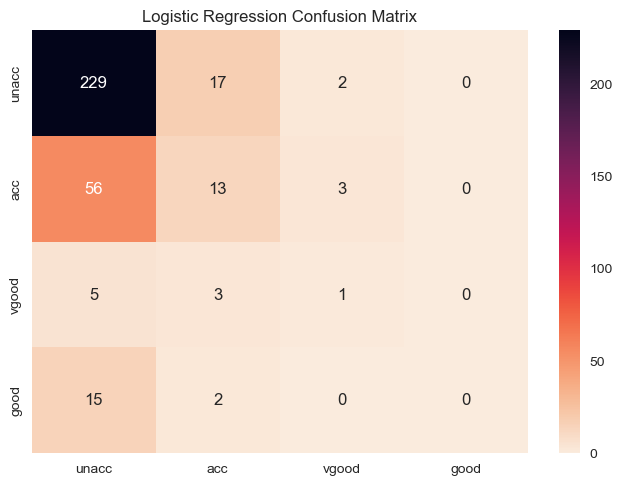

In [222]:
model_log = LogisticRegression()
model_log.fit(x_train,y_train)
y_pred = model_log.predict(x_test)
rep = report('Logistic Regression',y_test,y_pred)
Class = pd.concat([Class,rep],axis=1)
print(rep)
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d',cmap='rocket_r',xticklabels=categry,yticklabels=categry).set_title('Logistic Regression Confusion Matrix')

In [223]:
True_cat, Pred_cat = ['true '+i for i in categry],['pred '+i for i in categry]
conf = pd.DataFrame(confusion_matrix(y_test,y_pred),columns=True_cat, index= Pred_cat)
precision = [round((conf.iloc[i,i]/conf.iloc[i,:].sum())*100,2) for i in range(4)]
Recall = [round((conf.iloc[i,i]/conf.iloc[:,i].sum())*100,2) for i in range(4)]
Recall.append(0)
conf['Class Precision'] = precision
conf.loc['Class Recall'] = Recall
conf

,true unacc,true acc,true vgood,true good,Class Precision
pred unacc,229.00,17.00,2.00,0.0,92.34
pred acc,56.00,13.00,3.00,0.0,18.06
pred vgood,5.00,3.00,1.00,0.0,11.11
pred good,15.00,2.00,0.00,0.0,0.00
Class Recall,75.08,37.14,16.67,NaN,0.00


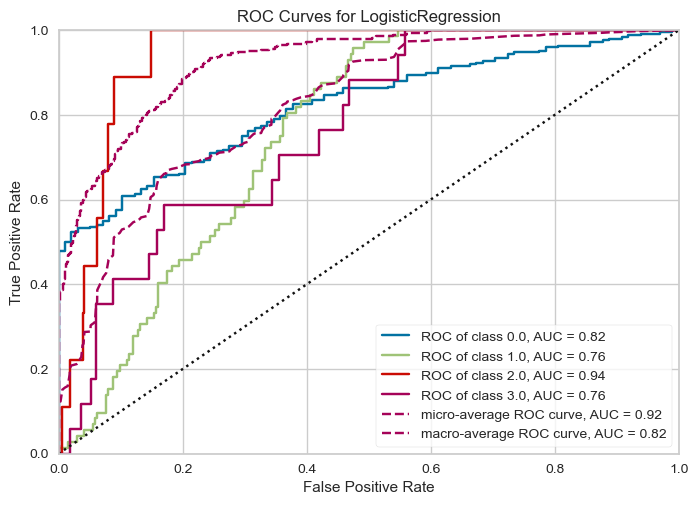

In [224]:

roc(model_log)

### Decision Tree

               Dicision Tree
Accuracy                0.97
Precision Wgt           0.97
F1 Score Wgt            0.97
Recall Wgt              0.97
Kappa Score             0.94


Text(0.5, 1.0, 'Dicision Tree Confussion Matrix')

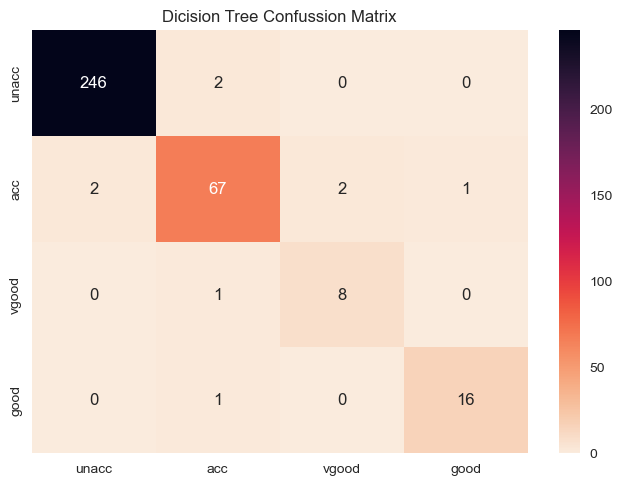

In [225]:
tree = DecisionTreeClassifier()
tree.fit(x_train,y_train)
y_pred = tree.predict(x_test)
rep = report('Dicision Tree',y_test,y_pred)
Class = pd.concat([Class,rep],axis=1)
print(rep)
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d',cmap='rocket_r',xticklabels=categry,yticklabels=categry).set_title('Dicision Tree Confussion Matrix')

In [226]:
True_cat, Pred_cat = ['true '+i for i in categry],['pred '+i for i in categry]
conf = pd.DataFrame(confusion_matrix(y_test,y_pred),columns=True_cat, index= Pred_cat)
precision = [round((conf.iloc[i,i]/conf.iloc[i,:].sum())*100,2) for i in range(4)]
Recall = [round((conf.iloc[i,i]/conf.iloc[:,i].sum())*100,2) for i in range(4)]
Recall.append(0)
conf['Class Precision'] = precision
conf.loc['Class Recall'] = Recall
conf

,true unacc,true acc,true vgood,true good,Class Precision
pred unacc,246.00,2.00,0.0,0.00,99.19
pred acc,2.00,67.00,2.0,1.00,93.06
pred vgood,0.00,1.00,8.0,0.00,88.89
pred good,0.00,1.00,0.0,16.00,94.12
Class Recall,99.19,94.37,80.0,94.12,0.00


In [227]:
Data = x_test[:]
Data['True Class'] = y_test
Data['Predicted Class'] = y_pred
val = tree.predict_proba(x_test)
Data[categry] = val
Data.head(10)

,Buying_price,Maintainance_Price,No_of_doors,Person_Capacity,Size_of_luggage,Safety,True Class,Predicted Class,unacc,acc,vgood,good
27,3,3,1,0,2,1,0.0,0.0,1.0,0.0,0.0,0.0
1156,2,2,2,2,1,2,1.0,1.0,0.0,1.0,0.0,0.0
1668,1,1,1,2,1,1,0.0,0.0,1.0,0.0,0.0,0.0
1622,1,1,0,0,2,0,0.0,0.0,1.0,0.0,0.0,0.0
692,0,2,1,1,0,0,1.0,1.0,0.0,1.0,0.0,0.0
330,3,1,0,0,0,1,0.0,0.0,1.0,0.0,0.0,0.0
1035,2,0,2,1,2,1,0.0,0.0,1.0,0.0,0.0,0.0
555,0,0,0,1,0,1,0.0,0.0,1.0,0.0,0.0,0.0
814,0,1,2,0,1,2,0.0,0.0,1.0,0.0,0.0,0.0
509,0,3,2,2,1,0,0.0,0.0,1.0,0.0,0.0,0.0


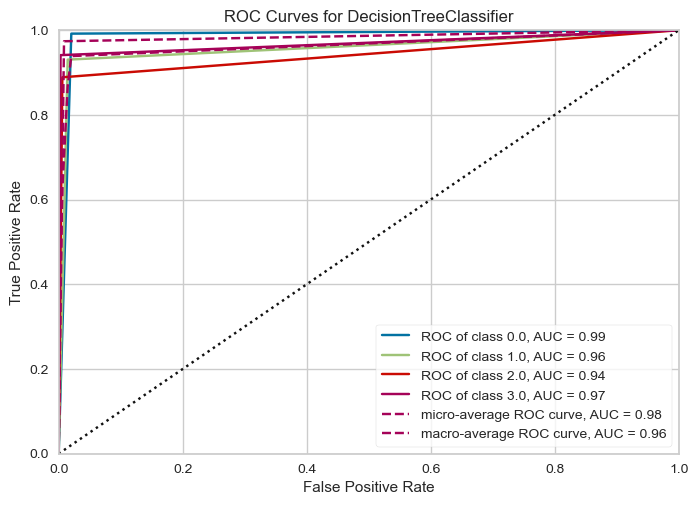

In [228]:
roc(tree)

### KNN Classifier

               KNN Classifier
Accuracy                 0.83
Precision Wgt            0.82
F1 Score Wgt             0.80
Recall Wgt               0.83
Kappa Score              0.55


Text(0.5, 1.0, 'KNN Classifier Confussion Matrix')

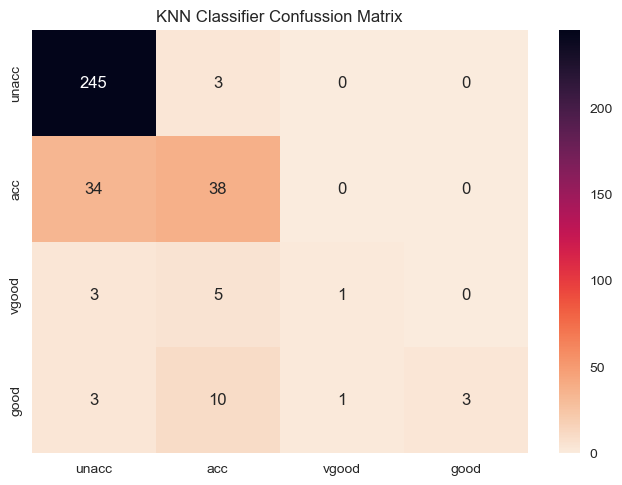

In [229]:
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(x_train,y_train)
y_pred =model_knn.predict(x_test)
rep = report('KNN Classifier',y_test,y_pred)
Class = pd.concat([Class,rep],axis=1)
print(rep)
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d',cmap='rocket_r',xticklabels=categry,yticklabels=categry).set_title('KNN Classifier Confussion Matrix')

In [230]:
True_cat, Pred_cat = ['true '+i for i in categry],['pred '+i for i in categry]
conf = pd.DataFrame(confusion_matrix(y_test,y_pred),columns=True_cat, index= Pred_cat)
precision = [round((conf.iloc[i,i]/conf.iloc[i,:].sum())*100,2) for i in range(4)]
Recall = [round((conf.iloc[i,i]/conf.iloc[:,i].sum())*100,2) for i in range(4)]
Recall.append(0)
conf['Class Precision'] = precision
conf.loc['Class Recall'] = Recall
conf

,true unacc,true acc,true vgood,true good,Class Precision
pred unacc,245.00,3.00,0.0,0.0,98.79
pred acc,34.00,38.00,0.0,0.0,52.78
pred vgood,3.00,5.00,1.0,0.0,11.11
pred good,3.00,10.00,1.0,3.0,17.65
Class Recall,85.96,67.86,50.0,100.0,0.00


## Naive Classifier

               Naive Classifier
Accuracy                   0.64
Precision Wgt              0.71
F1 Score Wgt               0.65
Recall Wgt                 0.64
Kappa Score                0.28


Text(0.5, 1.0, 'Naive Classifier Confussion Matrix')

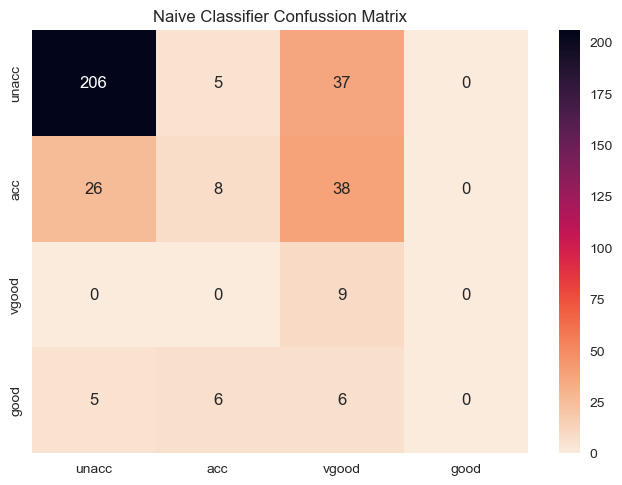

In [231]:
model_Naive = GaussianNB()
model_Naive.fit(x_train,y_train)
y_pred =model_Naive.predict(x_test)
rep = report('Naive Classifier',y_test,y_pred)
Class = pd.concat([Class,rep],axis=1)
print(rep)
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d',cmap='rocket_r',xticklabels=categry,yticklabels=categry).set_title('Naive Classifier Confussion Matrix')

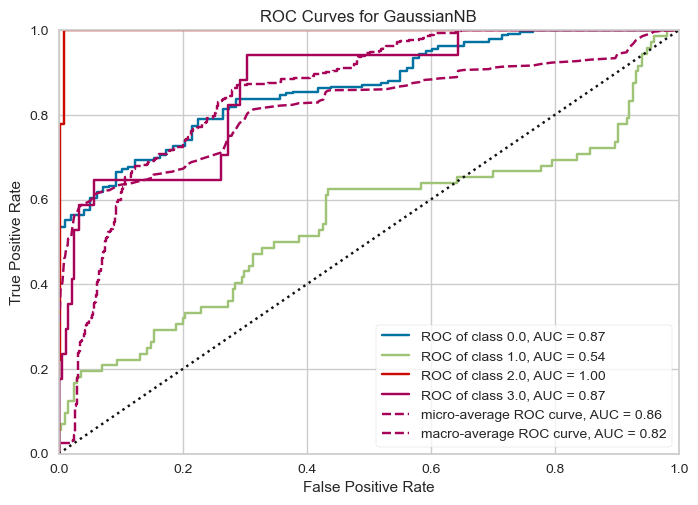

In [232]:
roc(model_Naive)

## Random forest Classifier

               Random Forest Classifier
Accuracy                           0.93
Precision Wgt                      0.93
F1 Score Wgt                       0.93
Recall Wgt                         0.93
Kappa Score                        0.84


Text(0.5, 1.0, 'Random Forest Classifier Confussion Matrix')

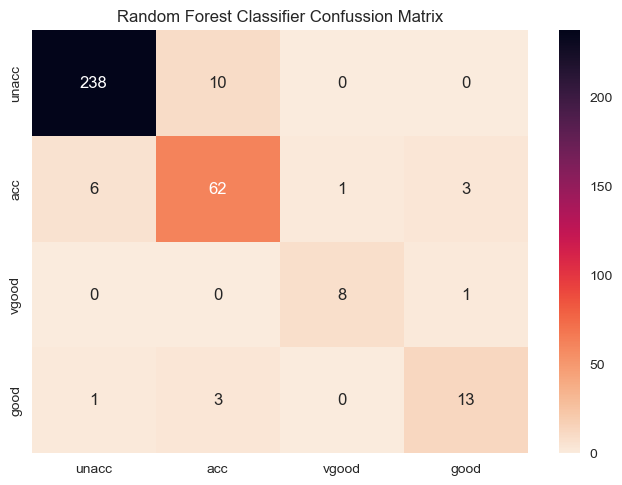

In [233]:
model_RF = RandomForestClassifier(n_estimators=3, random_state=100)
model_RF.fit(x_train,y_train)
y_pred =model_RF.predict(x_test)
rep = report('Random Forest Classifier',y_test,y_pred)
Class = pd.concat([Class,rep],axis=1)
print(rep)
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d',cmap='rocket_r',xticklabels=categry,yticklabels=categry).set_title('Random Forest Classifier Confussion Matrix')

In [234]:
True_cat, Pred_cat = ['true '+i for i in categry],['pred '+i for i in categry]
conf = pd.DataFrame(confusion_matrix(y_test,y_pred),columns=True_cat, index= Pred_cat)
precision = [round((conf.iloc[i,i]/conf.iloc[i,:].sum())*100,2) for i in range(4)]
Recall = [round((conf.iloc[i,i]/conf.iloc[:,i].sum())*100,2) for i in range(4)]
Recall.append(0)
conf['Class Precision'] = precision
conf.loc['Class Recall'] = Recall
conf

,true unacc,true acc,true vgood,true good,Class Precision
pred unacc,238.00,10.00,0.00,0.00,95.97
pred acc,6.00,62.00,1.00,3.00,86.11
pred vgood,0.00,0.00,8.00,1.00,88.89
pred good,1.00,3.00,0.00,13.00,76.47
Class Recall,97.14,82.67,88.89,76.47,0.00


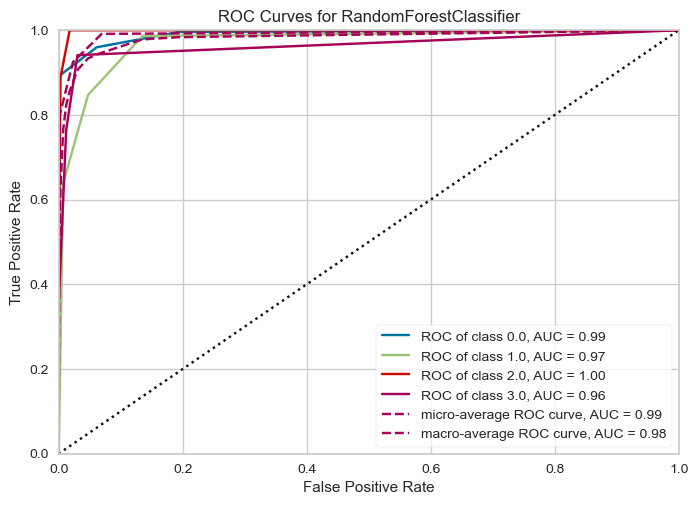

In [235]:
roc(model_RF)

### Model Performance 

In [236]:
Class

,Logistic Regression,Dicision Tree,KNN Classifier,Naive Classifier,Random Forest Classifier
Accuracy,0.70,0.97,0.83,0.64,0.93
Precision Wgt,0.62,0.97,0.82,0.71,0.93
F1 Score Wgt,0.65,0.97,0.80,0.65,0.93
Recall Wgt,0.70,0.97,0.83,0.64,0.93
Kappa Score,0.14,0.94,0.55,0.28,0.84


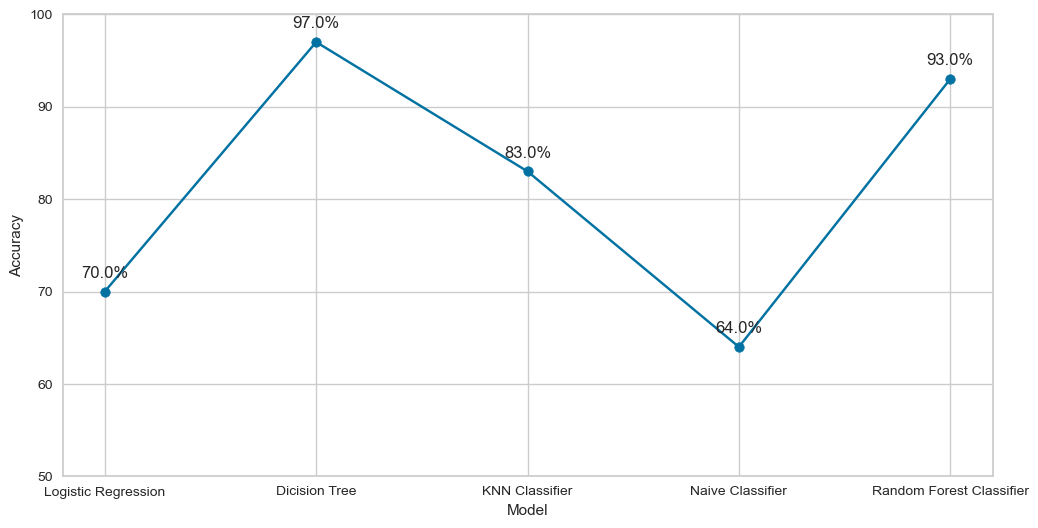

In [237]:
y = Class.loc['Accuracy',:].apply(lambda x: x*100)
plt.figure(figsize=(12,6))
plt.scatter(Class.columns,y)
plt.plot(Class.columns,y)
plt.ylim(50,100)
plt.xlabel('Model')
plt.ylabel('Accuracy')
for i, j in zip(Class.columns,y):
    plt.annotate(f'{j}%', (i,j), textcoords="offset points", xytext=(0, 10), ha='center')